# Predicting Taxa with Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor

from micropyome.taxa import regression
from micropyome.datasets import normalize

## Bacteria Taxa Predictions

In [2]:
DATASET_PATH = "data/averill_processed/bacteria/"

In [3]:
X = {}
Y = {}
for level in regression.TAXONOMIC_LEVELS:
    x = pd.read_csv(f"{DATASET_PATH}{level}/15_variables.csv")
    if level == 'fg':
        y = pd.read_csv(f"{DATASET_PATH}{level}/observed.csv")
    else:
        y = pd.read_csv(f"{DATASET_PATH}{level}/y_11groupTaxo.csv")

    x = x.drop(x.columns[0], axis=1)
    x = normalize(x)
    y = y.drop(y.columns[0], axis=1)

    X[level] = x
    Y[level] = y

In [4]:
X["fg"].head()

,latitude,longitude,depth_max,forest,map,map_sd,mat,mat_sd,map_CV,mat_CV,mdr,aridity,NPP,relEM,pH
0,0.704522,0.556021,0.33222,0.0,0.258311,0.499800,0.460053,0.540854,0.068699,0.099117,0.114684,0.344902,0.693018,0.873117,0.814276
1,0.704522,0.556021,0.33222,0.0,0.258311,0.311573,0.460053,0.351402,0.068699,0.099117,0.114684,0.344902,0.693018,0.873117,0.817741
2,0.704522,0.556021,0.33222,0.0,0.258311,0.569622,0.460053,0.372079,0.068699,0.099117,0.114684,0.344902,0.693018,0.873117,0.779626
3,0.704522,0.556021,0.33222,0.0,0.258311,0.500785,0.460053,0.567852,0.068699,0.099117,0.114684,0.344902,0.693018,0.873117,0.798683
4,0.704522,0.556021,0.33222,0.0,0.258311,0.400699,0.460053,0.580918,0.068699,0.099117,0.114684,0.344902,0.693018,0.873117,0.812543


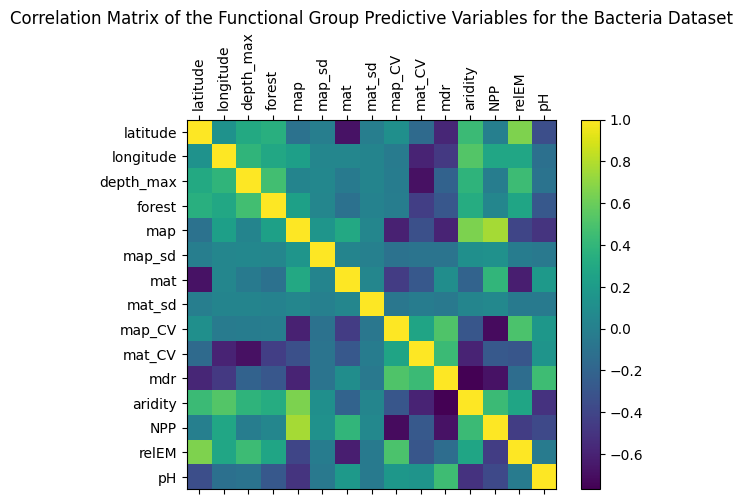

In [5]:
ex = X["fg"].copy()
from micropyome.datasets import normalize
normalize(ex)
fig = plt.figure()
ax = fig.add_subplot()
cax = ax.matshow(ex.corr())
fig.colorbar(cax)
labels = ex.columns.values
ax.set_yticks(list(range(len(labels))), labels)
ax.set_xticks(list(range(len(labels))), labels, rotation=90)
plt.title("Correlation Matrix of the Functional Group Predictive Variables for the Bacteria Dataset")
plt.show()

In [6]:
Y["fg"].head()

,other,assim_nitrate_reduction,assim_nitrite_reduction,cellulolytic,chitinolytic,copiotroph,denitrification,dissim_nitrate_reduction,dissim_nitrite_reduction,lignolytic,methanotroph,n_fixation,nitrification,oligotroph
0,0.893046,0.000957,0.002588,0.002595,0.002333,0.037817,0.003547,0.003358,0.005295,0.002366,0.000083,0.006273,0.000286,0.039454
1,0.889777,0.000788,0.004186,0.001942,0.002881,0.035736,0.003214,0.004851,0.004819,0.001714,0.000155,0.006312,0.000527,0.043100
2,0.848038,0.002428,0.006368,0.006620,0.003244,0.053938,0.008511,0.013298,0.005656,0.000937,0.000637,0.013354,0.000244,0.036729
3,0.866138,0.003326,0.004454,0.002900,0.003436,0.044006,0.005105,0.008007,0.008106,0.001687,0.000110,0.013447,0.000876,0.038404
4,0.885077,0.001408,0.000693,0.003014,0.001311,0.021446,0.004757,0.004836,0.004989,0.000560,0.000360,0.008940,0.000809,0.061803


## Create and Train Models

In [7]:
models = {
    "k-NN": KNeighborsRegressor(20),
    "Linear Regression": LinearRegression(),
    #"Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": MultiOutputRegressor(GradientBoostingRegressor()),
    #"Kernel Ridge": KernelRidge()
}

In [8]:
results = regression.train_evaluate_models_multiple_taxa(models, X, Y, threshold=0.006, k_fold=5)

2024-06-05T20:52:24.838428 > INFO Evaluating 4 models with 5 splits.
2024-06-05T20:52:24.839436 > INFO Level: fg
2024-06-05T20:52:24.842156 > INFO K-fold split: 0
2024-06-05T20:52:24.844681 > INFO Beginning the evaluation of 4 models.
2024-06-05T20:52:29.011212 > INFO K-fold split: 1
2024-06-05T20:52:29.015277 > INFO Beginning the evaluation of 4 models.
2024-06-05T20:52:33.679447 > INFO K-fold split: 2
2024-06-05T20:52:33.683656 > INFO Beginning the evaluation of 4 models.
2024-06-05T20:52:38.011152 > INFO K-fold split: 3
2024-06-05T20:52:38.016276 > INFO Beginning the evaluation of 4 models.
2024-06-05T20:52:42.306875 > INFO K-fold split: 4
2024-06-05T20:52:42.312800 > INFO Beginning the evaluation of 4 models.
2024-06-05T20:52:46.503693 > INFO Level: phylum
2024-06-05T20:52:46.505202 > INFO K-fold split: 0
2024-06-05T20:52:46.510015 > INFO Beginning the evaluation of 4 models.
2024-06-05T20:52:49.945948 > INFO K-fold split: 1
2024-06-05T20:52:49.949451 > INFO Beginning the evaluatio

In [9]:
averill_results = pd.read_csv(f"{DATASET_PATH}/r2_published_results.csv")
published_results = averill_results.iloc[0].to_list()[1:]

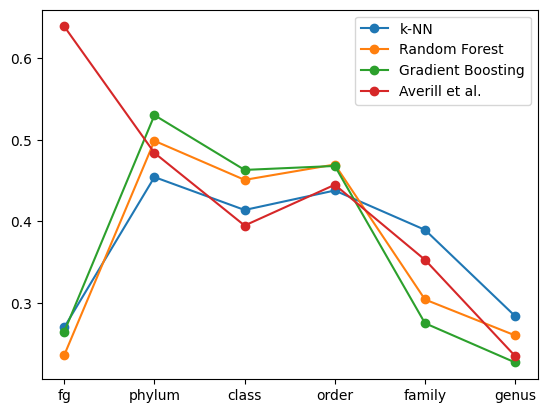

In [10]:
x = list(range(len(regression.TAXONOMIC_LEVELS)))

for model in models:
    if model == "Decision Tree" or model == "Linear Regression":
        continue
    y = [results[level][model] for level in regression.TAXONOMIC_LEVELS]
    plt.plot(x, y, "-o", label=model)

plt.plot(x, published_results, "-o", label="Averill et al.")
plt.xticks(x, regression.TAXONOMIC_LEVELS)
plt.legend()
plt.show()

## Regression with Fungi

In [1]:
from micropyome.datasets import normalize, normalize_categories
from micropyome.taxa import regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

DATASET_PATH = "data/averill_processed/fungi/"
X = {}
Y = {}

for level in regression.TAXONOMIC_LEVELS:
    x = pd.read_csv(f"{DATASET_PATH}{level}/13_variables.csv", float_precision='high')
    y = pd.read_csv(f"{DATASET_PATH}{level}/observed.csv", float_precision='high')

    x = x.drop(x.columns[0], axis=1)
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    x = pd.DataFrame(x)
    y = y.drop(y.columns[0], axis=1)

    X[level] = x
    Y[level] = y

In [2]:
models = {
    "k-NN": lambda: KNeighborsRegressor(20),
    #"Linear Regression": LinearRegression(),
    #"Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor,
    #"Gradient Boosting": MultiOutputRegressor(GradientBoostingRegressor()),
    #"Kernel Ridge": KernelRidge()
}

In [6]:
results = {}
results["fg"] = regression.train_evaluate_models(models, X["fg"], Y["fg"], threshold = 0.01, k_fold = 5)
results["phylum"] = regression.train_evaluate_models(models, X["phylum"], Y["phylum"], ignore = "other", threshold = 0.012, k_fold = 5)
results["class"] = regression.train_evaluate_models(models, X["class"], Y["class"], threshold = 0.012, k_fold = 5)
results["order"] = regression.train_evaluate_models(models, X["order"], Y["order"], threshold = 0.012, k_fold = 5)
results["family"] = regression.train_evaluate_models(models, X["family"], Y["family"], threshold = 0.012, k_fold = 5)
results["genus"] = regression.train_evaluate_models(models, X["genus"], Y["genus"], threshold = 0.012, k_fold = 5)

2024-06-05T22:20:29.665636 > INFO Evaluating 2 models with 5 splits.
2024-06-05T22:20:29.666635 > INFO K-fold split: 0
2024-06-05T22:20:29.668931 > INFO Beginning the evaluation of 2 models.
2024-06-05T22:20:29.796176 > INFO K-fold split: 1
2024-06-05T22:20:29.798918 > INFO Beginning the evaluation of 2 models.
2024-06-05T22:20:29.910806 > INFO K-fold split: 2
2024-06-05T22:20:29.914658 > INFO Beginning the evaluation of 2 models.
2024-06-05T22:20:30.029005 > INFO K-fold split: 3
2024-06-05T22:20:30.032254 > INFO Beginning the evaluation of 2 models.
2024-06-05T22:20:30.146627 > INFO K-fold split: 4
2024-06-05T22:20:30.150231 > INFO Beginning the evaluation of 2 models.
2024-06-05T22:20:30.265202 > INFO Evaluating 2 models with 5 splits.
2024-06-05T22:20:30.266347 > INFO K-fold split: 0
2024-06-05T22:20:30.270465 > INFO Beginning the evaluation of 2 models.
2024-06-05T22:20:30.377755 > INFO K-fold split: 1
2024-06-05T22:20:30.385282 > INFO Beginning the evaluation of 2 models.
2024-06-

In [4]:
published_results = []

for level in regression.TAXONOMIC_LEVELS:
    y = pd.read_csv(f"{DATASET_PATH}{level}/observed.csv", float_precision='high')
    y = y.drop(y.columns[0], axis=1)
    pred = pd.read_csv(f"{DATASET_PATH}{level}/predicted.csv", float_precision='high')
    pred = pred.drop(pred.columns[0], axis=1)

    if level == "phylum":
        pred = pred.drop(columns="other", errors="ignore")
        y = y.drop(columns="other", errors="ignore")
    elif level == "fg":
        for column in y.columns:
            if y[column].mean() < 0.01:
                pred = pred.drop(columns=column, errors='ignore')
                y = y.drop(columns=column, errors='ignore')
    else:
        for column in y.columns:
            if y[column].mean() < 0.012:
                pred = pred.drop(columns=column, errors='ignore')
                y = y.drop(columns=column, errors='ignore')

    published_prediction = normalize_categories(pred)
    y = normalize_categories(y)
    r2 = regression.r2_score_by_column(y, published_prediction)
    print(f"{level}: {r2}")
    published_results.append(np.mean(r2))

fg: [0.1978582882768236, 0.45028880104861146, 0.4695423859997909, 0.06407045928882293, -0.16994653593444897]
phylum: [0.24676521517610528, 0.38249152081434823, 0.21801550009216963, 0.15364659278626602]
class: [-0.043119054150356995, 0.21082219407605984, 0.21277155131600411, 0.2600131037775891, 0.3772026861829393, 0.2602979482156027, 0.1749219361528589, 0.31016625064534475, 0.30140222831291075, 0.12636302432308832]
order: [0.12276441816617234, 0.22068858168120864, 0.18979612026043713, 0.23741248549454463, 0.22078763381037303, 0.34707452927384574, 0.04128302981091436, -0.010437430089333954, 0.08340527287941935, 0.18843953261633162, 0.34248948939635315, 0.20208707755421096, 0.3279284717957961, 0.29707227610818865, 0.3300682335770879, 0.32005076021272416, -0.5313211354153722]
family: [0.18234480777387874, 0.21988215266324784, 0.19230779076008053, 0.2304362677377345, 0.21038587735695824, 0.02587057152985739, -0.1428335367299045, 0.01258348384765684, 0.18388575280189356, 0.1599405358907401, 

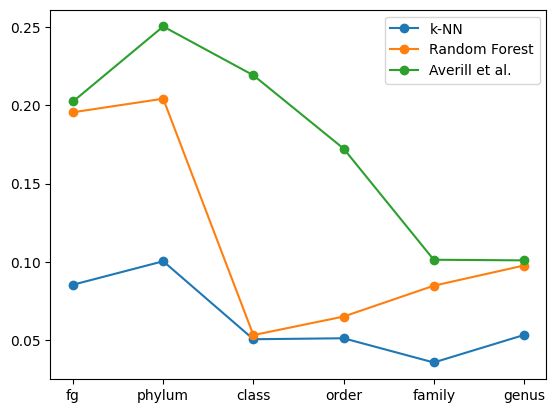

In [7]:
x = list(range(len(regression.TAXONOMIC_LEVELS)))

for model in models:
    y = [results[level][model] for level in regression.TAXONOMIC_LEVELS]
    plt.plot(x, y, "-o", label=model)

plt.plot(x, published_results, "-o", label="Averill et al.")
plt.xticks(x, regression.TAXONOMIC_LEVELS)
plt.legend()
plt.show()

In [ ]:
ex = X["fg"].copy()
from micropyome.datasets import normalize
normalize(ex)
fig = plt.figure()
ax = fig.add_subplot()
cax = ax.matshow(ex.corr())
fig.colorbar(cax)
labels = ex.columns.values
ax.set_yticks(list(range(len(labels))), labels)
ax.set_xticks(list(range(len(labels))), labels, rotation=90)
plt.title("Correlation Matrix of the Functional Group Predictive Variables for the Fungi Dataset")
plt.show()

### Eliminate Columns

Evaluate performances by selecting the R square value of the three first
columns (i.e. taxa).

In [ ]:
def test_with_limited_columns(n: int, ignore: str = None) -> None:
    # Evaluation
    results = regression.train_evaluate_models_multiple_taxa(
        models, X, Y, ignore=ignore, threshold=0.01, k_fold=5, keep_columns=n
    )

    published_results = []
    for level in regression.TAXONOMIC_LEVELS:
        published_prediction = pd.read_csv(f"{DATASET_PATH}{level}/predicted.csv")
        published_prediction = published_prediction.drop(published_prediction.columns[0], axis=1)
        if ignore:
            published_prediction = published_prediction.drop(columns=ignore)
            y_level = Y[level].copy()
            y_level = y_level.drop(columns=ignore)
        else:
            y_level = Y[level].copy()
        published_prediction = normalize_categories(published_prediction)
        r2 = regression.r2_score_by_column(y_level, published_prediction)[:n]
        print(f"{level}: {r2}")
        published_results.append(np.mean(r2))

    # Plot
    x = list(range(len(regression.TAXONOMIC_LEVELS)))

    for model in models:
        if model == "Decision Tree":
            continue
        y = [results[level][model] for level in regression.TAXONOMIC_LEVELS]
        plt.plot(x, y, "-o", label=model)

    plt.plot(x, published_results, "-o", label="Averill et al.")
    plt.xticks(x, regression.TAXONOMIC_LEVELS)
    plt.legend()
    title = f"n = {n}" if ignore is None else f"n = {n}, ignore = {ignore}"
    plt.title(title)
    plt.axhline(y=0.0, linestyle='--')
    plt.show()

2024-05-24T07:46:38.006991 > INFO Evaluating 6 models with 5 splits.
2024-05-24T07:46:38.008178 > INFO Level: fg
2024-05-24T07:46:38.008178 > INFO K-fold split: 0
2024-05-24T07:46:38.013878 > INFO Beginning the evaluation of 6 models.
2024-05-24T07:46:38.027498 >     Evaluated the model `k-NN`.
2024-05-24T07:46:38.038468 >     Evaluated the model `Linear Regression`.
2024-05-24T07:46:38.081310 >     Evaluated the model `Decision Tree`.
2024-05-24T07:46:38.191135 >     Evaluated the model `Random Forest`.
2024-05-24T07:46:38.520938 >     Evaluated the model `Gradient Boosting`.
2024-05-24T07:46:38.528133 >     Evaluated the model `Kernel Ridge`.
2024-05-24T07:46:38.528133 > INFO K-fold split: 1
2024-05-24T07:46:38.536198 > INFO Beginning the evaluation of 6 models.
2024-05-24T07:46:38.543527 >     Evaluated the model `k-NN`.
2024-05-24T07:46:38.550461 >     Evaluated the model `Linear Regression`.
2024-05-24T07:46:38.562343 >     Evaluated the model `Decision Tree`.
2024-05-24T07:46:38.

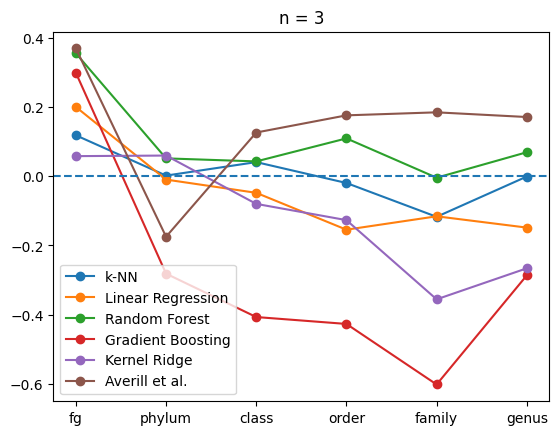

In [ ]:
test_with_limited_columns(3)

2024-05-24T07:47:04.817835 > INFO Evaluating 6 models with 5 splits.
2024-05-24T07:47:04.823215 > INFO Level: fg
2024-05-24T07:47:04.824979 > INFO K-fold split: 0
2024-05-24T07:47:04.827255 > INFO Beginning the evaluation of 6 models.
2024-05-24T07:47:04.840551 >     Evaluated the model `k-NN`.
2024-05-24T07:47:04.850846 >     Evaluated the model `Linear Regression`.
2024-05-24T07:47:04.860044 >     Evaluated the model `Decision Tree`.
2024-05-24T07:47:05.003809 >     Evaluated the model `Random Forest`.
2024-05-24T07:47:05.313959 >     Evaluated the model `Gradient Boosting`.
2024-05-24T07:47:05.353289 >     Evaluated the model `Kernel Ridge`.
2024-05-24T07:47:05.353289 > INFO K-fold split: 1
2024-05-24T07:47:05.353289 > INFO Beginning the evaluation of 6 models.
2024-05-24T07:47:05.366794 >     Evaluated the model `k-NN`.
2024-05-24T07:47:05.378727 >     Evaluated the model `Linear Regression`.
2024-05-24T07:47:05.385656 >     Evaluated the model `Decision Tree`.
2024-05-24T07:47:05.

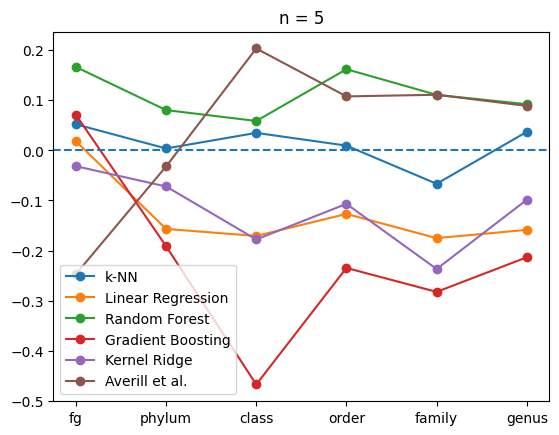

In [ ]:
test_with_limited_columns(5)

2024-05-24T07:47:32.713112 > INFO Evaluating 6 models with 5 splits.
2024-05-24T07:47:32.715025 > INFO Level: fg
2024-05-24T07:47:32.718219 > INFO K-fold split: 0
2024-05-24T07:47:32.724133 > INFO Beginning the evaluation of 6 models.
2024-05-24T07:47:32.743434 >     Evaluated the model `k-NN`.
2024-05-24T07:47:32.762948 >     Evaluated the model `Linear Regression`.
2024-05-24T07:47:32.777645 >     Evaluated the model `Decision Tree`.
2024-05-24T07:47:32.930087 >     Evaluated the model `Random Forest`.
2024-05-24T07:47:33.276684 >     Evaluated the model `Gradient Boosting`.
2024-05-24T07:47:33.288822 >     Evaluated the model `Kernel Ridge`.
2024-05-24T07:47:33.291650 > INFO K-fold split: 1
2024-05-24T07:47:33.295959 > INFO Beginning the evaluation of 6 models.
2024-05-24T07:47:33.309756 >     Evaluated the model `k-NN`.
2024-05-24T07:47:33.317928 >     Evaluated the model `Linear Regression`.
2024-05-24T07:47:33.330641 >     Evaluated the model `Decision Tree`.
2024-05-24T07:47:33.

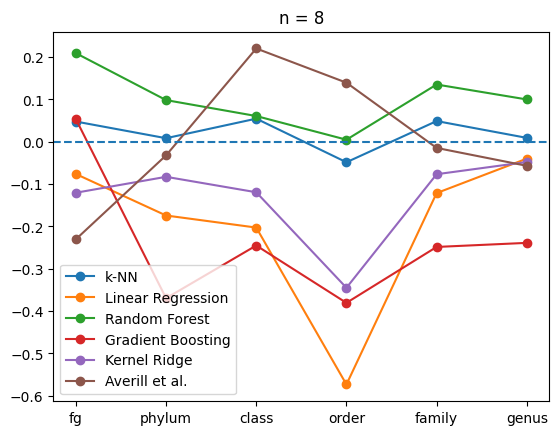

In [ ]:
test_with_limited_columns(8)

2024-05-24T07:48:00.648298 > INFO Evaluating 6 models with 5 splits.
2024-05-24T07:48:00.649766 > INFO Level: fg
2024-05-24T07:48:00.651199 > INFO K-fold split: 0
2024-05-24T07:48:00.655985 > INFO Beginning the evaluation of 6 models.
2024-05-24T07:48:00.665822 >     Evaluated the model `k-NN`.
2024-05-24T07:48:00.681030 >     Evaluated the model `Linear Regression`.
2024-05-24T07:48:00.693007 >     Evaluated the model `Decision Tree`.
2024-05-24T07:48:00.855069 >     Evaluated the model `Random Forest`.
2024-05-24T07:48:01.194823 >     Evaluated the model `Gradient Boosting`.
2024-05-24T07:48:01.209600 >     Evaluated the model `Kernel Ridge`.
2024-05-24T07:48:01.211062 > INFO K-fold split: 1
2024-05-24T07:48:01.214565 > INFO Beginning the evaluation of 6 models.
2024-05-24T07:48:01.228403 >     Evaluated the model `k-NN`.
2024-05-24T07:48:01.237835 >     Evaluated the model `Linear Regression`.
2024-05-24T07:48:01.251222 >     Evaluated the model `Decision Tree`.
2024-05-24T07:48:01.

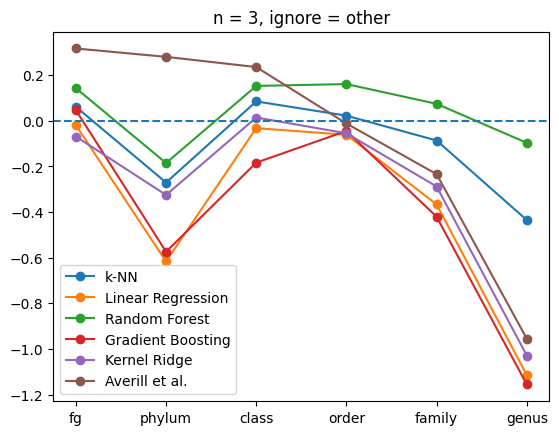

In [ ]:
test_with_limited_columns(3, "other")

2024-05-24T07:48:30.605557 > INFO Evaluating 6 models with 5 splits.
2024-05-24T07:48:30.610080 > INFO Level: fg
2024-05-24T07:48:30.611251 > INFO K-fold split: 0
2024-05-24T07:48:30.618505 > INFO Beginning the evaluation of 6 models.
2024-05-24T07:48:30.633889 >     Evaluated the model `k-NN`.
2024-05-24T07:48:30.645749 >     Evaluated the model `Linear Regression`.
2024-05-24T07:48:30.667576 >     Evaluated the model `Decision Tree`.
2024-05-24T07:48:30.837293 >     Evaluated the model `Random Forest`.
2024-05-24T07:48:31.235505 >     Evaluated the model `Gradient Boosting`.
2024-05-24T07:48:31.257154 >     Evaluated the model `Kernel Ridge`.
2024-05-24T07:48:31.262319 > INFO K-fold split: 1
2024-05-24T07:48:31.264852 > INFO Beginning the evaluation of 6 models.
2024-05-24T07:48:31.280854 >     Evaluated the model `k-NN`.
2024-05-24T07:48:31.293753 >     Evaluated the model `Linear Regression`.
2024-05-24T07:48:31.306298 >     Evaluated the model `Decision Tree`.
2024-05-24T07:48:31.

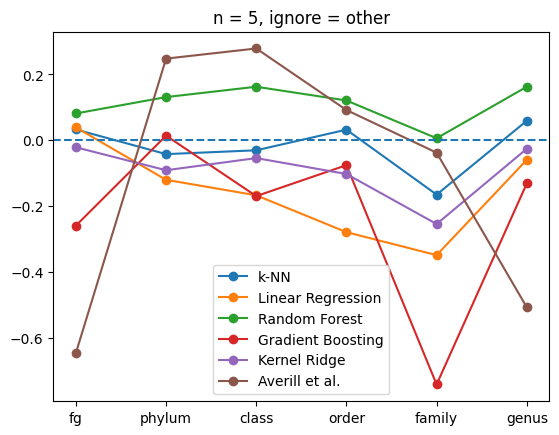

In [ ]:
test_with_limited_columns(5, "other")

2024-05-24T07:49:00.690038 > INFO Evaluating 6 models with 5 splits.
2024-05-24T07:49:00.692006 > INFO Level: fg
2024-05-24T07:49:00.695680 > INFO K-fold split: 0
2024-05-24T07:49:00.698500 > INFO Beginning the evaluation of 6 models.
2024-05-24T07:49:00.707855 >     Evaluated the model `k-NN`.
2024-05-24T07:49:00.725358 >     Evaluated the model `Linear Regression`.
2024-05-24T07:49:00.737666 >     Evaluated the model `Decision Tree`.
2024-05-24T07:49:00.927727 >     Evaluated the model `Random Forest`.
2024-05-24T07:49:01.326011 >     Evaluated the model `Gradient Boosting`.
2024-05-24T07:49:01.339700 >     Evaluated the model `Kernel Ridge`.
2024-05-24T07:49:01.344729 > INFO K-fold split: 1
2024-05-24T07:49:01.348505 > INFO Beginning the evaluation of 6 models.
2024-05-24T07:49:01.358940 >     Evaluated the model `k-NN`.
2024-05-24T07:49:01.373866 >     Evaluated the model `Linear Regression`.
2024-05-24T07:49:01.385422 >     Evaluated the model `Decision Tree`.
2024-05-24T07:49:01.

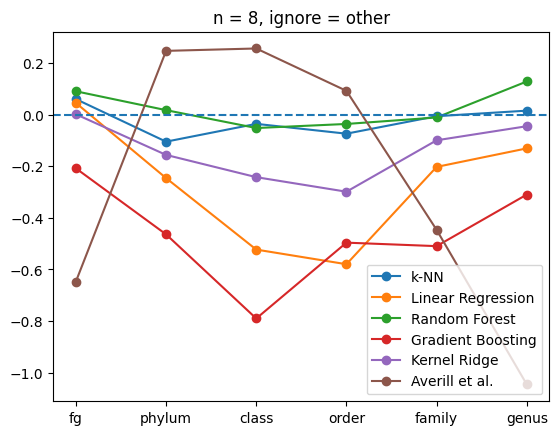

In [ ]:
test_with_limited_columns(8, "other")

## Transfer Learning with Fungi

Train the models on all available data points.

In [ ]:
models = {
    "k-NN": lambda: KNeighborsRegressor(20),
    "Linear Regression": lambda: LinearRegression(),
    "Decision Tree": lambda: DecisionTreeRegressor(),
    "Random Forest": lambda: RandomForestRegressor(),
    "Gradient Boosting": lambda: MultiOutputRegressor(GradientBoostingRegressor()),
    "Kernel Ridge": lambda: KernelRidge()
}
trained_models = {}
for level in regression.TAXONOMIC_LEVELS:
    trained_models[level] = {}
    for model in models:
        trained_models[level][model] = models[model]()
        trained_models[level][model].fit(X[level], Y[level])

In [ ]:
TRANSFER_DATASET_PATH = "data/averill_tranfer"
SAMPLING_LEVELS = ["core", "plot", "site"]

X2 = {}
Y2 = {}
averill_results = {}

for level in regression.TAXONOMIC_LEVELS:
    X2[level] = {}
    Y2[level] = {}
    averill_results[level] = {}
    for sampling in SAMPLING_LEVELS:
        x = pd.read_csv(f"{TRANSFER_DATASET_PATH}/Variables/{level}_{sampling}_13Var.csv", delimiter=";")
        x = x.drop(x.columns[0], axis=1)
        x = normalize(x)
        y = pd.read_csv(f"{TRANSFER_DATASET_PATH}/Observed/{level}_{sampling}_observed.csv")
        y = y.drop(y.columns[0], axis=1)
        y = normalize_categories(y)
        z = pd.read_csv(f"{TRANSFER_DATASET_PATH}/Predicted/{level}_{sampling}_predicted.csv")
        z = z.drop(z.columns[0], axis=1)
        z = normalize_categories(z)
        X2[level][sampling] = x
        Y2[level][sampling] = y
        averill_results[level][sampling] = z

In [ ]:
X2["fg"]["core"].head()

,pC,cn,pH,NPP,map,mat,forest,conifer,relEM,P,K,Ca,Mg
0,0.409551,0.493222,0.183508,0.659976,0.800551,0.104998,1.0,1.0,0.684333,0.523519,0.323785,0.677458,0.762925
1,0.409551,0.493222,0.183508,0.659976,0.800551,0.104998,1.0,1.0,0.684333,0.523519,0.323785,0.677458,0.762925
2,0.409551,0.493222,0.183508,0.659976,0.800551,0.104998,1.0,1.0,0.684333,0.523519,0.323785,0.677458,0.762925
3,0.409551,0.493222,0.183508,0.659976,0.800551,0.104998,1.0,1.0,0.684333,0.523519,0.323785,0.677458,0.762925
4,0.449557,0.461103,0.107240,0.659976,0.800551,0.104998,1.0,1.0,0.634757,0.254657,0.264546,0.807743,0.861824


In [ ]:
Y2["fg"]["core"].head()

,other,Saprotroph,Ectomycorrhizal,Wood_Saprotroph,Animal_Pathogen,Plant_Pathogen
0,0.278330,0.169980,0.547714,0.001988,0.000994,0.000994
1,0.088469,0.344930,0.545726,0.012922,0.000994,0.006958
2,0.000994,0.007952,0.988072,0.000994,0.000994,0.000994
3,0.772366,0.075547,0.143141,0.006958,0.000994,0.000994
4,0.380716,0.147117,0.441352,0.028827,0.000994,0.000994


In [ ]:
averill_results["fg"]["core"].head()

,mean.other,mean.Saprotroph,mean.Ectomycorrhizal,mean.Wood_Saprotroph,mean.Animal_Pathogen,mean.Plant_Pathogen
0,0.169523,0.349924,0.318562,0.095838,0.030913,0.035241
1,0.169948,0.350793,0.317564,0.095564,0.030968,0.035163
2,0.171233,0.351855,0.315821,0.094760,0.031213,0.035119
3,0.171406,0.349828,0.316899,0.095593,0.031033,0.035241
4,0.197384,0.427429,0.180244,0.115199,0.034781,0.044962


In [ ]:
def test_averill_transfer(
        n: int = None, ignore: str = None, published_ignored: str = None
    ):

    results = {}

    for level in regression.TAXONOMIC_LEVELS:
        results[level] = {}
        for sampling in SAMPLING_LEVELS:
            if ignore:
                y_level = Y2[level][sampling].copy()
                y_level = y_level.drop(columns=ignore)
                published_result = averill_results[level][sampling].copy()
                published_result = published_result.drop(columns=published_ignored)
            else:
                published_result = averill_results[level][sampling].copy()
                y_level = Y2[level][sampling].copy()
            r2 = regression.r2_score_by_column(y_level, published_result)
            if n:
                results[level][sampling] = np.mean(r2[:n])
            else:
                results[level][sampling] = np.mean(r2)

    x = list(range(len(SAMPLING_LEVELS)))

    for level in results:
        y = [results[level][sampling] for sampling in results[level]]
        if sum(y) < -20:
            continue
        plt.plot(x, y, "-o", label=level)

    plt.xticks(x, SAMPLING_LEVELS)
    plt.legend()
    plt.show()

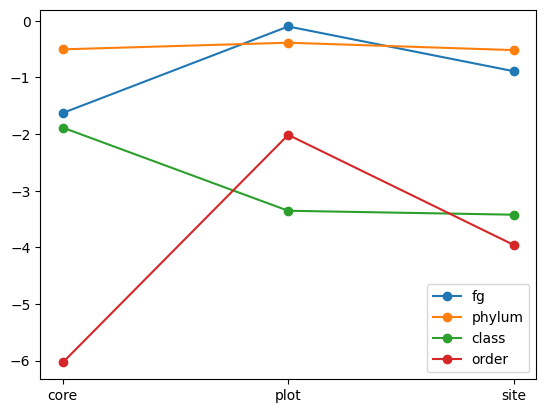

In [ ]:
test_averill_transfer()

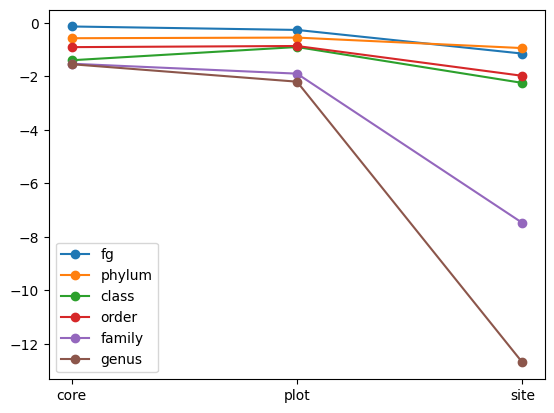

In [ ]:
test_averill_transfer(3)

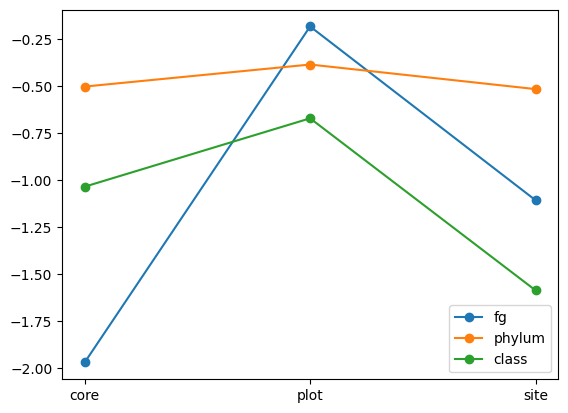

In [ ]:
test_averill_transfer(5)

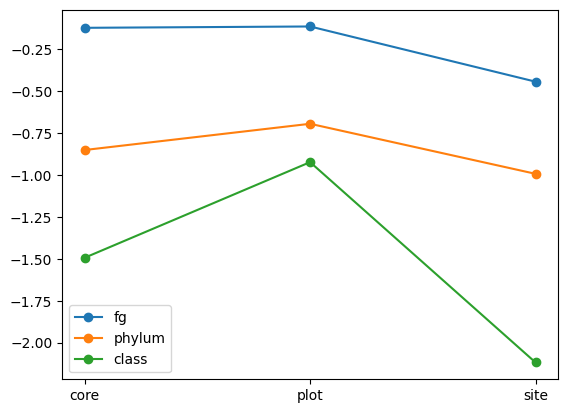

In [ ]:
test_averill_transfer(3, "other", "mean.other")

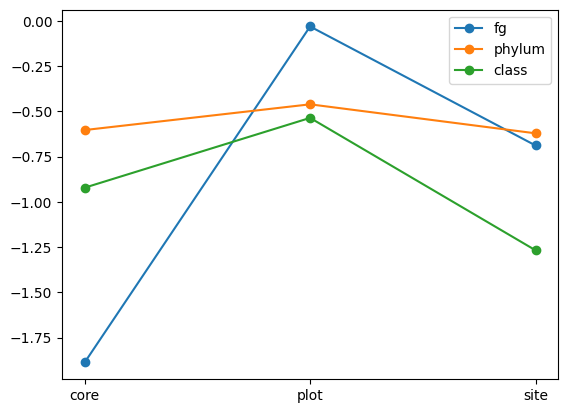

In [ ]:
test_averill_transfer(5, "other", "mean.other")

In [ ]:
X["fg"].head()

,pC,cn,pH,NPP,map,mat,forest,conifer,relEM,P,K,Ca,Mg
0,0.117690,0.137679,0.319820,0.456897,0.332847,0.229954,1.0,1.0,0.95,0.689368,0.370576,0.653786,0.214249
1,0.410766,0.285934,0.200450,0.456897,0.350451,0.224292,1.0,1.0,1.00,0.803620,0.403604,0.638502,0.171916
2,0.614954,0.666470,0.074324,0.482759,0.340660,0.235251,1.0,1.0,1.00,0.879013,0.761538,0.688865,0.302511
3,0.741352,0.342608,0.333333,0.456897,0.338446,0.234155,1.0,1.0,0.95,0.855072,0.703136,0.906135,0.548063
4,0.122018,0.248959,0.743243,0.456897,0.349377,0.233607,1.0,0.0,0.99,0.657549,0.524231,0.826396,0.454103


In [ ]:
X2["fg"]["core"].head()

,pC,cn,pH,NPP,map,mat,forest,conifer,relEM,P,K,Ca,Mg
0,0.409551,0.493222,0.183508,0.659976,0.800551,0.104998,1.0,1.0,0.684333,0.523519,0.323785,0.677458,0.762925
1,0.409551,0.493222,0.183508,0.659976,0.800551,0.104998,1.0,1.0,0.684333,0.523519,0.323785,0.677458,0.762925
2,0.409551,0.493222,0.183508,0.659976,0.800551,0.104998,1.0,1.0,0.684333,0.523519,0.323785,0.677458,0.762925
3,0.409551,0.493222,0.183508,0.659976,0.800551,0.104998,1.0,1.0,0.684333,0.523519,0.323785,0.677458,0.762925
4,0.449557,0.461103,0.107240,0.659976,0.800551,0.104998,1.0,1.0,0.634757,0.254657,0.264546,0.807743,0.861824


In [ ]:
x = list(range(len(SAMPLING_LEVELS)))

MODEL_NAMES = [
    "k-NN",
    "Linear Regression",
    "Decision Tree",
    "Random Forest",
    "Gradient Boosting",
    "Kernel Ridge"
]

def test_transfer_model(model_name: str):
    for level in regression.TAXONOMIC_LEVELS:
        print(level)
        if level == "genus":
            continue
        r = []
        for sampling in SAMPLING_LEVELS:
            print(f"    {sampling}")
            y = Y2[level][sampling]
            y_pred = trained_models[level][model_name].predict(X2[level][sampling])
            r2 = regression.r2_score_by_column(y, y_pred)
            print(level, sampling, r2)
            r.append(np.mean(r2))
        if sum(r) < -500:
            continue
        plt.plot(x, r, "-o", label=level)

    plt.xticks(x, SAMPLING_LEVELS)
    plt.legend()
    plt.title(model_name)
    plt.show()

fg
    core
fg core [-0.550271194199029, -0.3556653449076308, -0.5564202787868191, -0.14439854618090675, -0.02837330087012746, -0.13873753446266424]
    plot
fg plot [-0.8686208617938271, -0.7647401304107608, -0.8798009674979335, -0.202038531030436, -2.644996179148107, -0.7532473716032795]
    site
fg site [-2.268682844625498, -2.333249703994286, -2.0782790291073288, -0.34993461833741857, -10.149187074740356, -1.989205824192029]
phylum
    core
phylum core [-0.06646963898282499, -1.3133028687872437, -0.37369414023439784, -1.3158564697310977, -0.20330839999316686]
    plot
phylum plot [-0.4974312828994305, -1.3717071515812518, -0.6374466504997758, -1.214965009627321, -0.2362395875212535]
    site
phylum site [-1.2648938504877036, -2.6767516276746792, -1.1114280872046898, -2.0813901616785864, -0.28165522826398415]
class
    core
class core [-0.5078849778623837, -1.3418284135770282, -1.923927806594905, -1.52686518654849, -0.40860919419678154, -0.11486711743833022, -2.994303760848416, -0.2

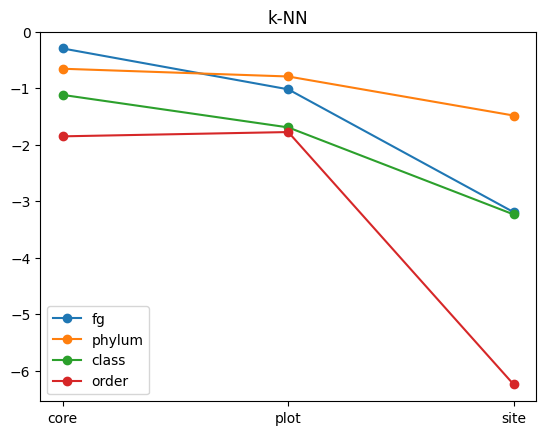

In [ ]:
test_transfer_model("k-NN")

fg
    core
fg core [-0.17236958714458384, -0.6798767860246084, 0.007350557549589243, -0.7920309395770493, -0.13573811747448605, 0.09095291880984224]
    plot
fg plot [-0.1601594330788203, -1.0799897249288737, 0.12179393709152586, -0.8942212894800168, -2.33922655436989, -0.3534019630204781]
    site
fg site [-0.6152018026627435, -5.271656706470189, -0.4563841416514065, -1.5575953386084458, -10.110980612206824, -0.849539853441925]
phylum
    core
phylum core [-0.040860287285897634, -1.3355484237101316, -0.2672838108996427, -2.0776587839132157, -0.07057513984913544]
    plot
phylum plot [-0.45087167555230256, -0.9929585123496878, -0.3476894790997971, -2.736118888556573, -0.05896474605791102]
    site
phylum site [-1.4589520035584722, -3.586641601981694, -0.6329747355521826, -7.507117029208178, 0.03548937358467341]
class
    core
class core [-0.34541237755931986, -1.3637567878287329, -2.5442860305347414, -3.1335298168728656, -0.29065655464938533, 0.03996453224725405, -17.903873146325246, 

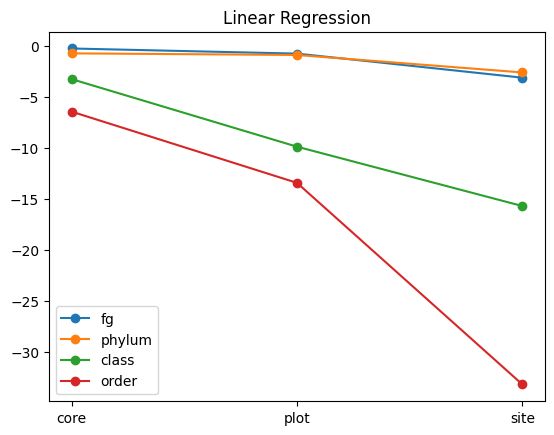

In [ ]:
test_transfer_model("Linear Regression")

fg
    core
fg core [-0.6083662230576417, -1.659958770730277, 0.25947612119311325, -2.9807990224564866, -0.7814032157643278, -2.621845765021828]
    plot
fg plot [-1.4080379858430594, -2.728514311381059, 0.2556276348591111, -3.211904936024407, -3.2604067187675883, -2.114674007437692]
    site
fg site [-4.239558364691464, -5.042434903615006, -0.4507746182279766, -18.016226681743227, -11.077546860143144, -3.6742542469662904]
phylum
    core
phylum core [-0.034614529736433086, -6.730471121364201, -1.1572890142077248, -20.881505665825344, -0.4681942677822868]
    plot
phylum plot [-0.563681320627953, -9.848934482777226, -1.2956262241390384, -22.831654543813954, -0.8993484140602725]
    site
phylum site [-1.1896517838705352, -23.76328879097712, -1.9476442186091436, -56.56181999438789, -0.9401334682799007]
class
    core
class core [-0.5566476738512751, -2.159647070031714, -10.449463411547146, -3.7075235845505548, -1.021547044938805, -0.25464433233105166, -22.942581948946856, -0.252169527913

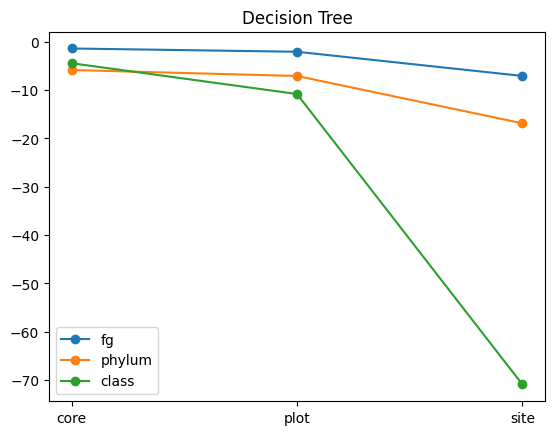

In [ ]:
test_transfer_model("Decision Tree")

fg
    core
fg core [-0.2620743289681602, -0.2925709265188621, 0.1804979255945668, -0.40931477131801763, -0.6799273215860189, 0.11565035620407982]
    plot
fg plot [-0.4421886465221332, -0.5879071211548161, 0.28765858694214996, -0.27195164570498975, -2.0403815232428606, -0.23593642189776198]
    site
fg site [-1.7149438101171373, -1.7785694555405196, 0.3811037287128227, -0.8758635405610498, -8.743142873709454, -1.0280983472560492]
phylum
    core
phylum core [-0.07479522633929192, -3.4755567933271463, -0.4494998626404616, -2.371726374293445, -0.05950248885798182]
    plot
phylum plot [-0.5139698975958544, -3.184198992805137, -0.463813163083195, -1.6940662177663506, -0.0707885396176926]
    site
phylum site [-1.2305331756761473, -7.122437400512583, -0.9110732815931786, -0.8847815260190175, -0.39110904921631584]
class
    core
class core [-0.41183286171325184, -2.3965281374913325, -3.8060598879048078, -1.7581015880610624, -0.45719596802782747, -0.1598002296441523, -12.325756640704487, -0

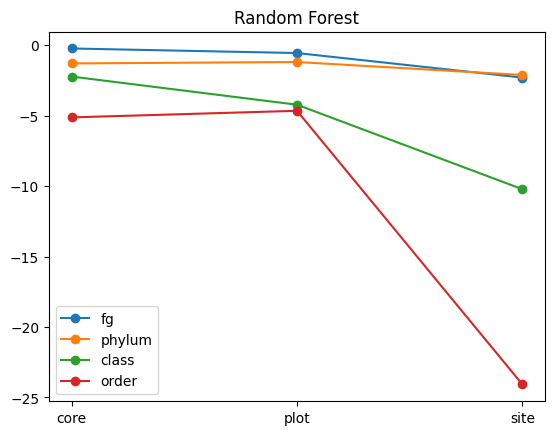

In [ ]:
test_transfer_model("Random Forest")

fg
    core
fg core [-0.39575351064861386, -1.1813446745920415, 0.03679757794760419, -1.3360411395935587, -1.23031450568741, -0.2534971529565886]
    plot
fg plot [-0.7820427202994571, -2.1181797408819882, 0.2236517015236572, -1.5013360615187175, -1.750942645713553, 0.02974683865532024]
    site
fg site [-2.2288252296361835, -4.552200812743697, 0.31812278805990635, -15.958198711609796, -7.679209367819212, -0.18865477669082575]
phylum
    core
phylum core [-0.04940373685003774, -6.024341853189185, -0.42883825055361613, -15.5068677129236, 0.07010860997485191]
    plot
phylum plot [-0.3054646047537457, -5.569727645868386, -0.4435076014237753, -16.58917291924101, 0.0884719018545087]
    site
phylum site [-0.8812252860055216, -18.181305047695147, -0.994481324698373, -20.85947925333153, -0.2452985461379118]
class
    core
class core [-0.36340367603013024, -7.751776051346811, -4.650183919277966, -13.89200197506015, -0.536761475081061, -0.27557619528863375, -9.53013713576764, -0.06642682704242

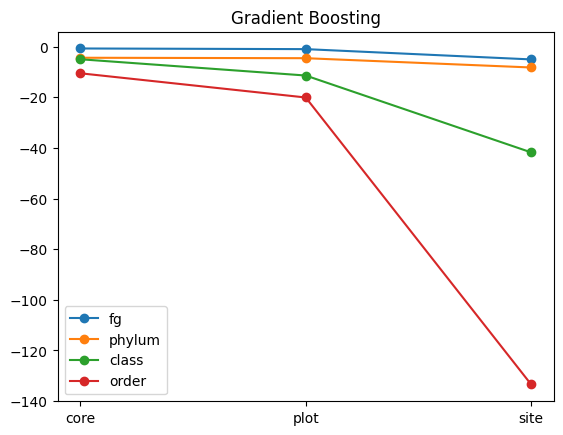

In [ ]:
test_transfer_model("Gradient Boosting")

fg
    core
fg core [-0.47266634922778494, -1.1972983406784818, -0.154995630867528, -0.634128318844501, -0.17316556750396273, 0.022784368094394325]
    plot
fg plot [-0.8417627470359241, -2.8742046253321853, -0.2544911003806569, -0.9913063825580655, -2.928468497181131, -0.42041807531871567]
    site
fg site [-1.9197604308476568, -7.050888628846691, -1.052354122324786, -1.662653339914844, -10.799229230726755, -1.2228441134519192]
phylum
    core
phylum core [-0.04588351893873455, -2.4809211411378542, -0.1789540234221294, -2.0420314507751502, -0.4073647943286325]
    plot
phylum plot [-0.4552262183286344, -3.288719757011889, -0.19770599656646226, -3.5818230066506933, -0.5978737325060066]
    site
phylum site [-1.3458424918831247, -7.900714722814454, -0.4332151536710447, -9.285142966793098, -0.8319559275276773]
class
    core
class core [-0.4234518207311786, -2.5245751554536513, -2.786896224482476, -2.5016382094734713, -0.32774618803043754, -0.08932123338252573, -9.678670002126065, -0.638

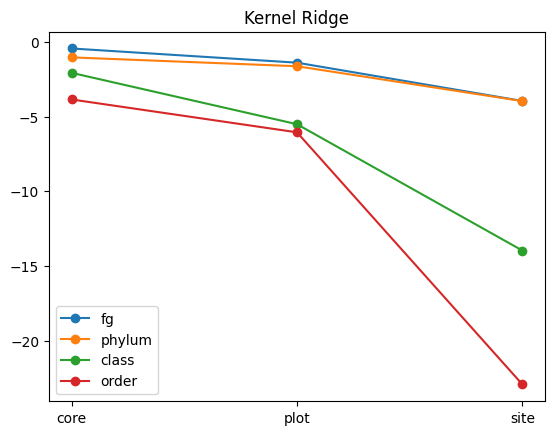

In [ ]:
test_transfer_model("Kernel Ridge")